<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import sys
sys.path.append("Distribution_Regression_Streams/")
from importlib import reload
import numpy as np
import data_generators.GBM
from data_generators import GBM
import utils
from utils import *
import GP_models as GP_models
from GP_models import GP_classic as GP_naive
from GP_models import GP_sig_precomputed as GP_sig
import experiments
from experiments import * 
import signature_features
from signature_features import *
import experiment_script
from experiment_script import exp1
import numpy as np

In [95]:
reload(GBM)

example = GBM.gbm(N_bags=30, N_items=15,spec_param={'a': [0., 2.], 'b': [0.5, 0.5]},t_span=np.linspace(0, 1, 200))
example.generate_data_GBM()
example.get_a()
#example.get_e_ang()

In [96]:
example.samples.shape

(200, 30, 15, 1)

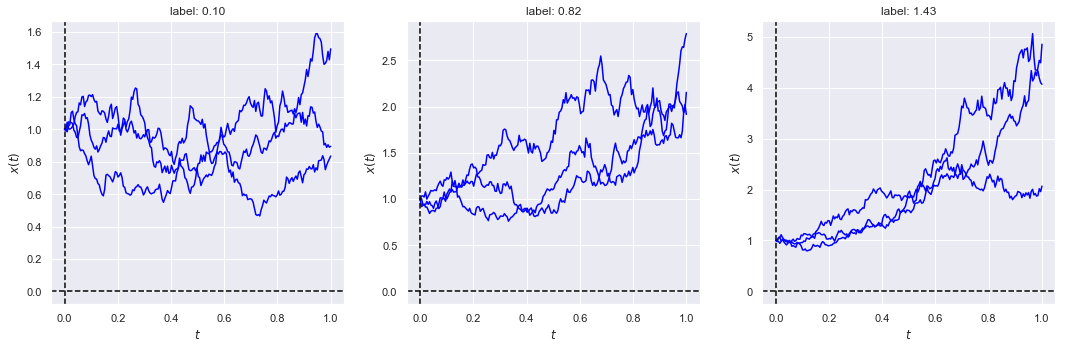

In [97]:
example.plot(N_items=3)

In [98]:
reload(utils)
data_scaled, y_scaled, train_indices, test_indices = utils.split_standardize(example.labels,example.paths,standardized=True,method='stratify')

In [99]:
X_aug = utils.add_dimension(data_scaled,add_time=False,lead_lag=0)

In [100]:
# X_aug = data_scaled

In [101]:
X_aug.shape

(30, 15, 399, 2)

shape of the final features (N_bags, D): (30, 6)


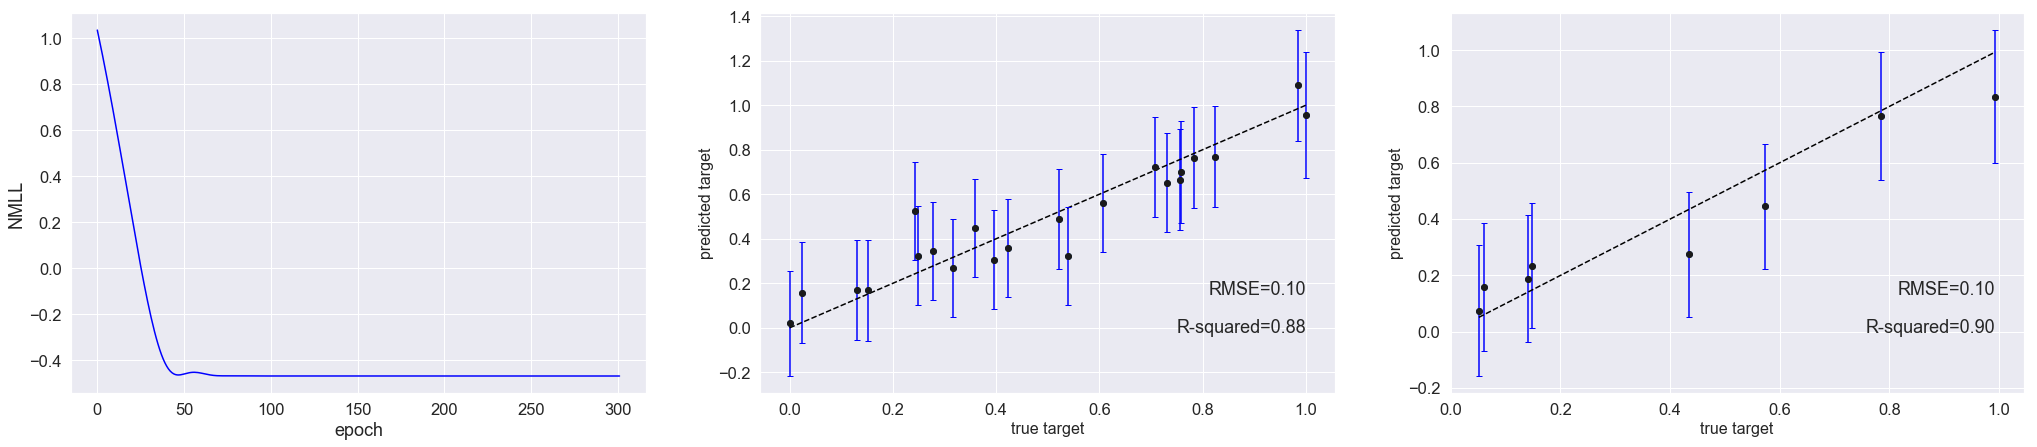

In [102]:
reload(experiments)
reload(signature_features)
reload(GP_sig)
reload(GP_sig_ARD)

sig_level = 2

# Compute the expected signature
expected_sig = signature_features.scaled_expected_sig([e.copy() for e in X_aug],sig_level)
#expected_sig = signature_features.scaled_expected_sig([e.copy() for e in data_scaled], sig_level, M=1000,
 #                                                                     a=1, ilya_rescale=True, return_norms=False)
# Standard scale the features
features = expected_sig
# var = np.var(features,axis=0)
# ## potentially scale the features
# scaler = StandardScaler()
# to_fit = [features[i] for i in train_indices]
# scaler.fit(to_fit)
# features = scaler.transform(features)

print('shape of the final features (N_bags, D):', features.shape)

# Precompute the Gram matrix, as we do not optimize any parameter
K_precomputed = experiments.precompute_K(features)

# Train and Predict
a,b,c,d = experiments.experiment_precomputed(K_precomputed,y_scaled,train_indices,test_indices,param_init=[0,0,0],RBF=False,plot=True)
     
#a,b,c,d = experiments.experiment_ARD(features,y_scaled,2,sig_level,train_indices,test_indices,param_init=[10,0,0],RBF=True,plot=True)
      

shape of the final features (N_bags, D): (100, 42)


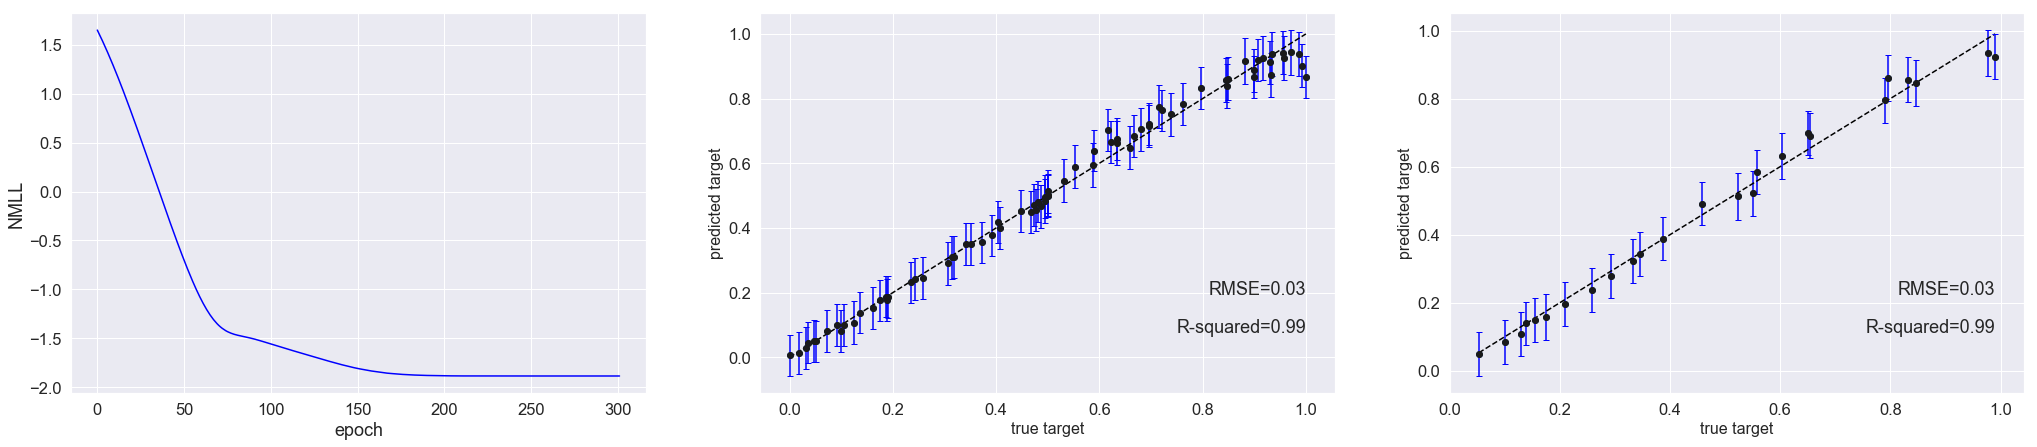

In [215]:
# specs for pathwise expected sig
reload(signature_features)
reload(experiments)
reload(GP_sig_ARD)
sig_level1 = 2

# specs for signature
sig_level2 = 2

# pathwise expected sig  
expected_pathwise_sig = signature_features.scaled_pathwise_expected_iisignature([e.copy() for e in X_aug],sig_level1)

features = expected_pathwise_sig

signatures = iisignature.sig(features,sig_level2)

print('shape of the final features (N_bags, D):', signatures.shape)

# Precompute the Gram matrix
K_precomputed = experiments.precompute_K(signatures)

a,b,c,d = experiments.experiment_precomputed(K_precomputed, y_scaled,train_indices,test_indices,plot=True)

      
#a,b,c,d = experiments.experiment_ARD(signatures,y_scaled,14,sig_level2,train_indices,test_indices,param_init=[10,0,0],RBF=False,plot=True)

shape of the input (N_bags, N_items, D): (30, 15, 798)


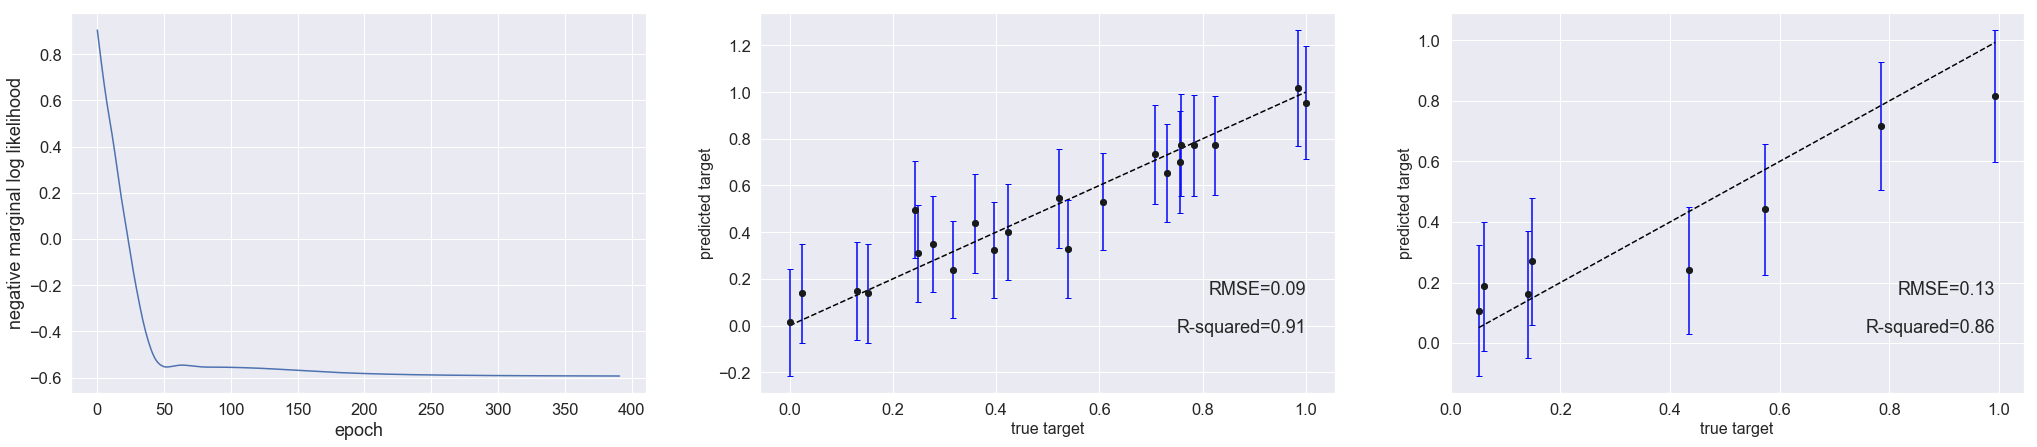

In [103]:
reload(experiments)
reload(GP_naive)
input_ = X_aug
N = np.array(input_).shape[3]
input_ = np.concatenate([np.array(np.array(input_)[:,:,:,k]) for k in range(N)],axis=2)
print('shape of the input (N_bags, N_items, D):', input_.shape)

train_RBF_rmse, train_RBF_r2, test_RBF_rmse, test_RBF_r2 = experiments.naive_experiment(input_, y_scaled, train_indices, test_indices,
                                                   RBF_top=False,param_init=[10,0,0,0],device=torch.device('cpu'),plot=True)

    

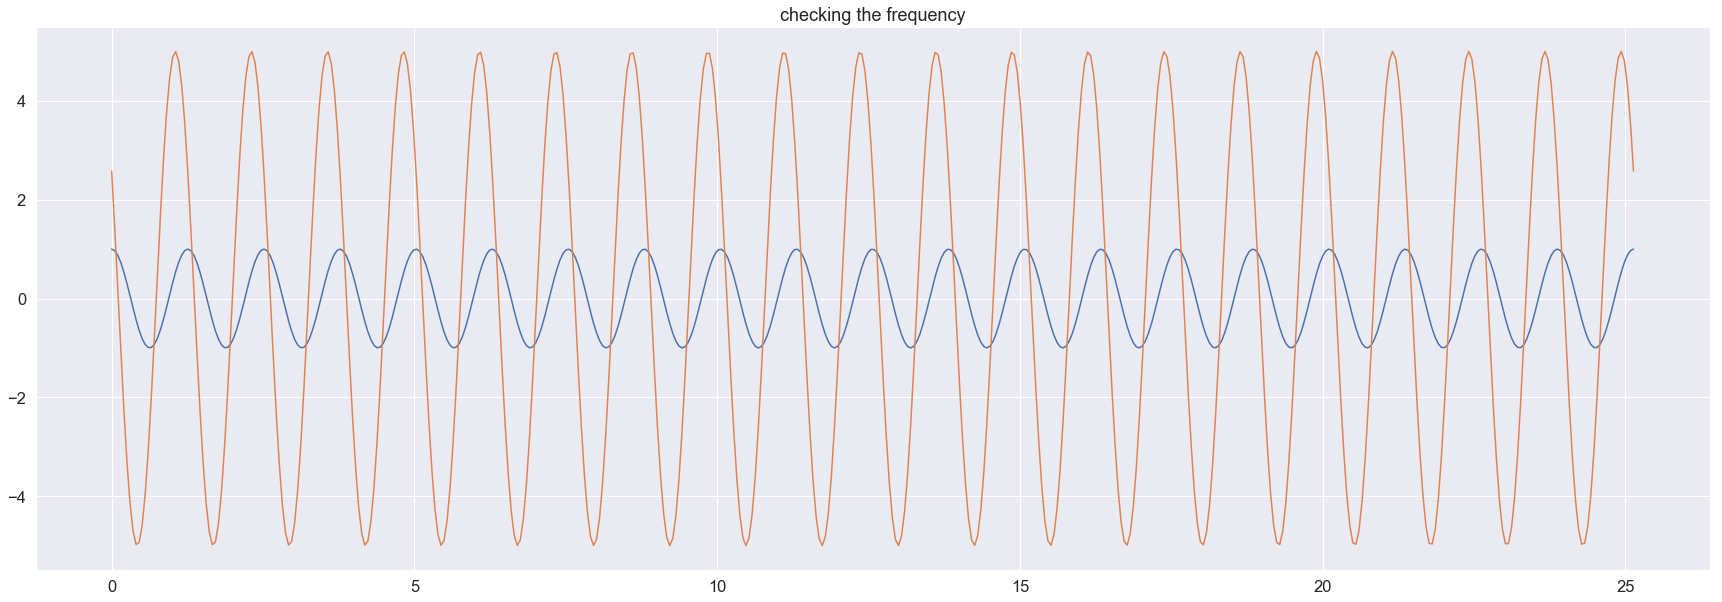

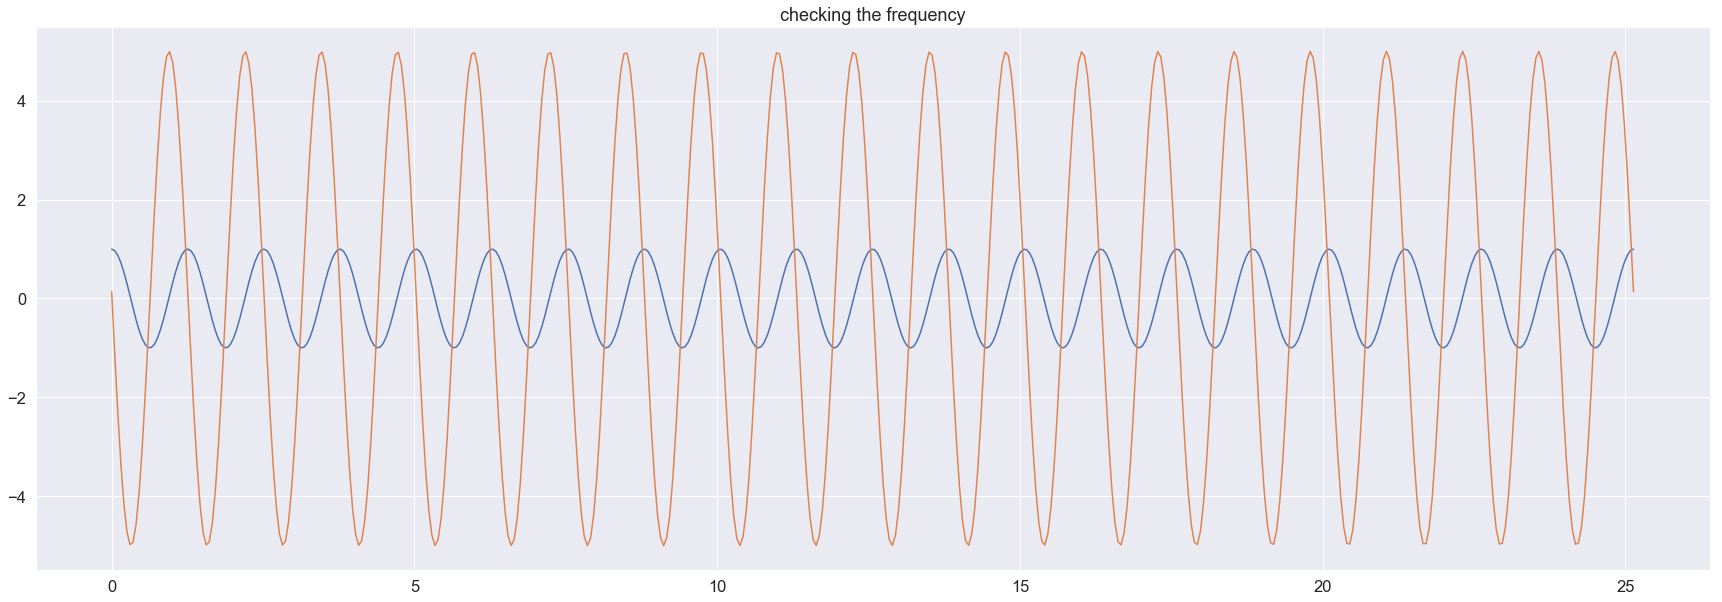

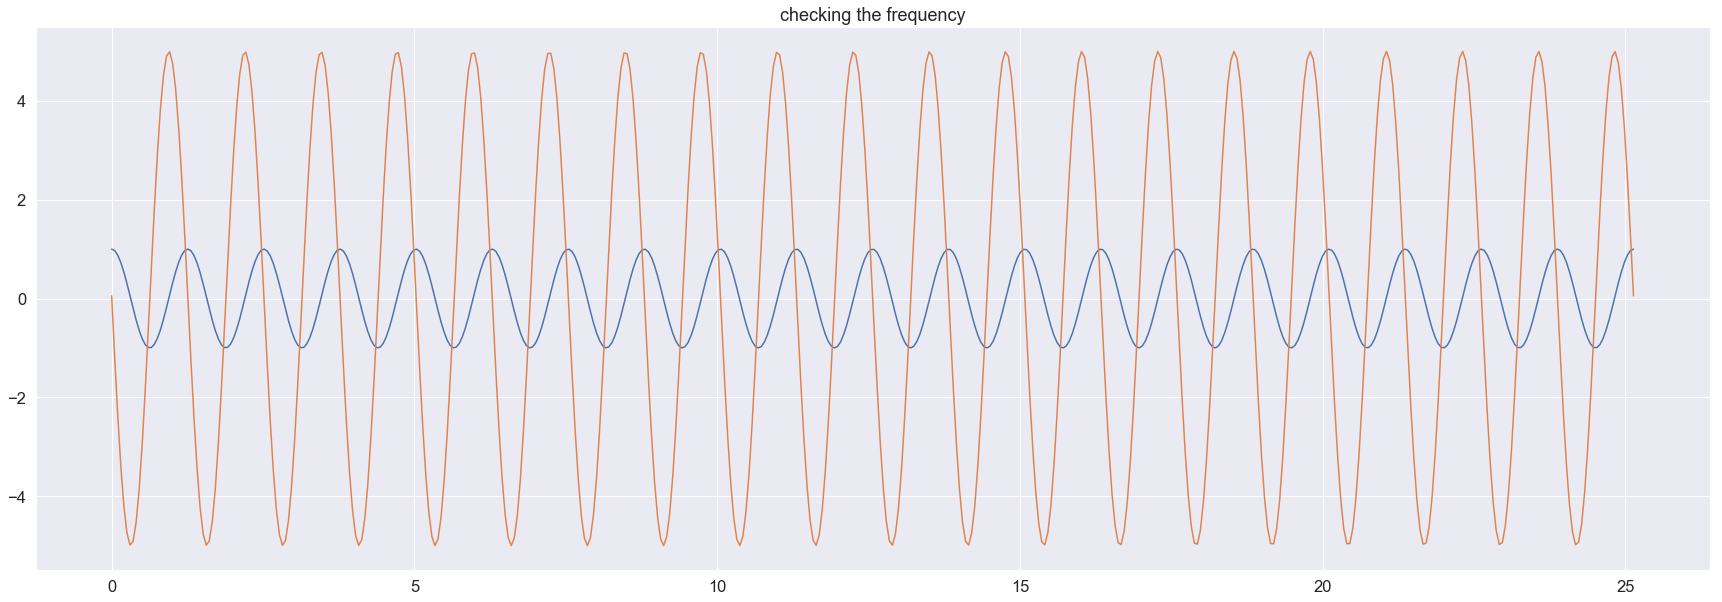

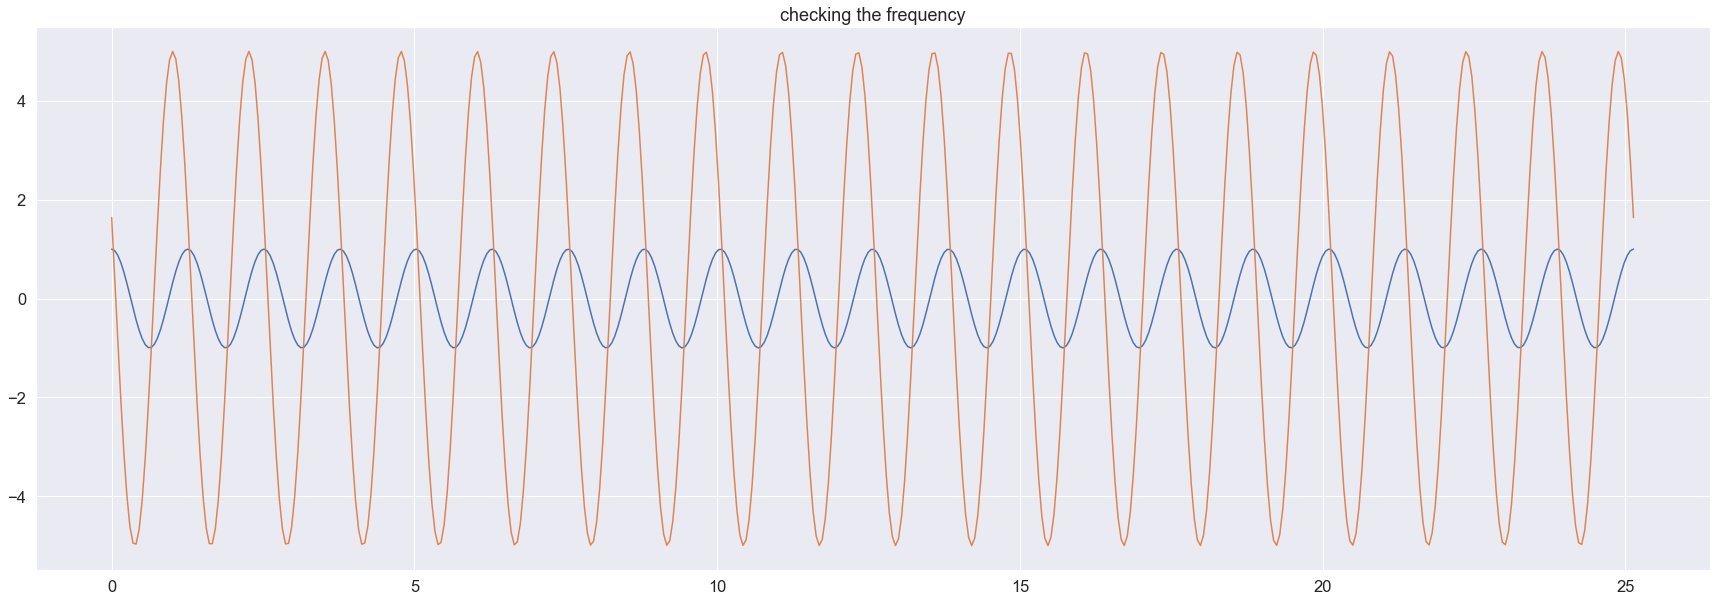

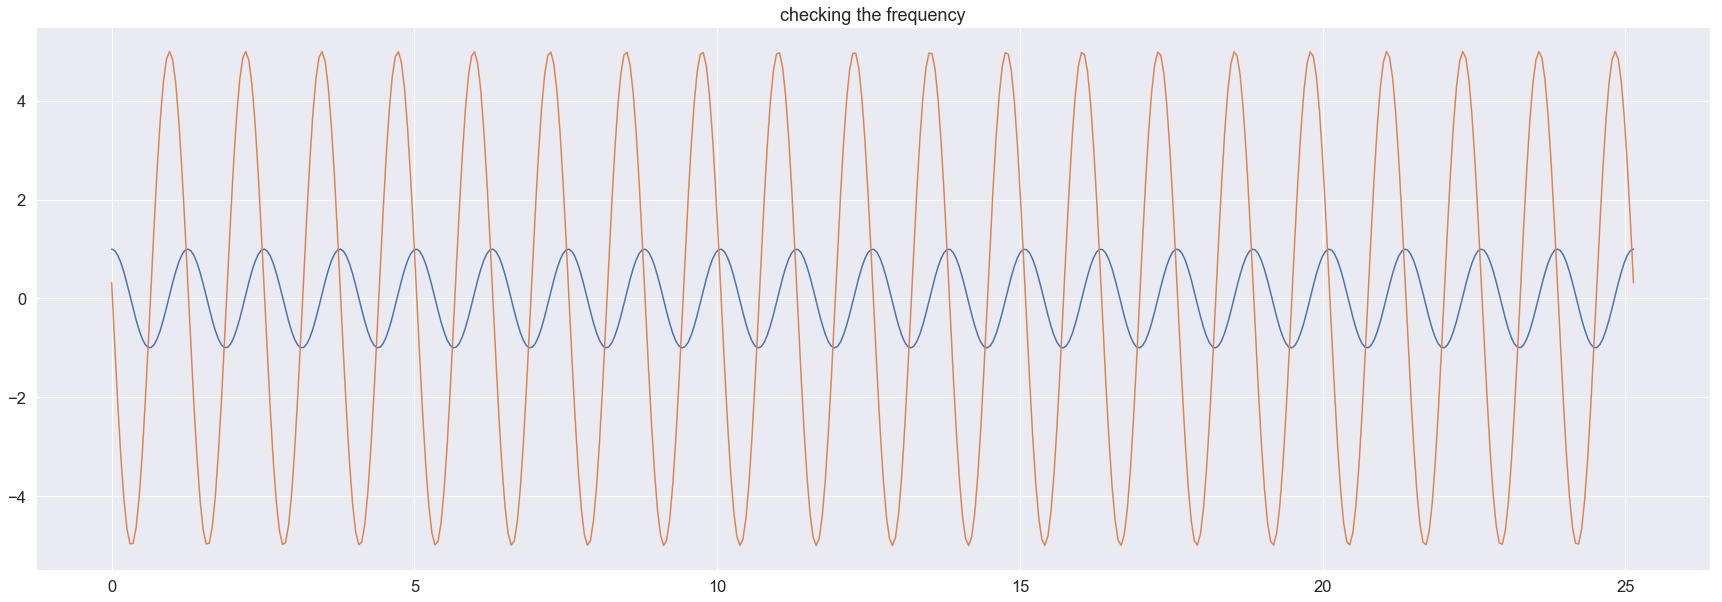

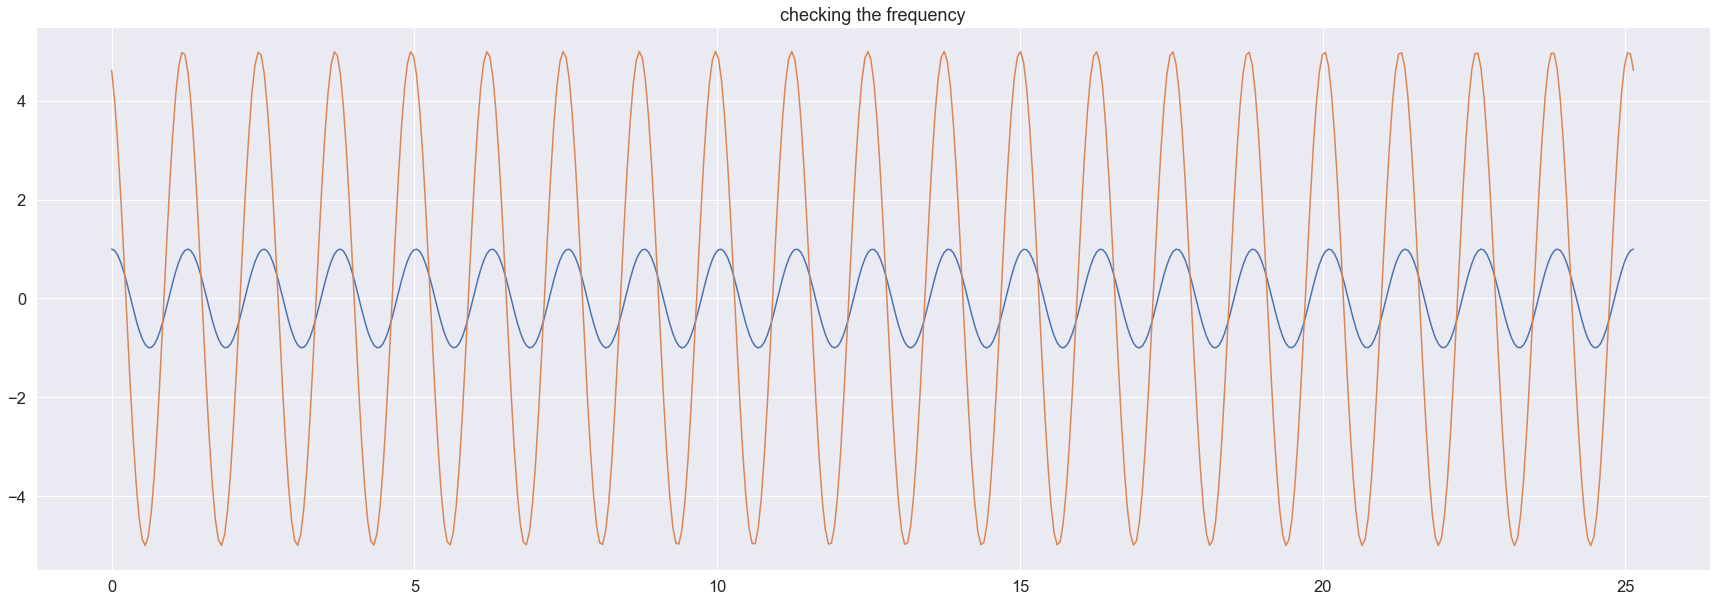

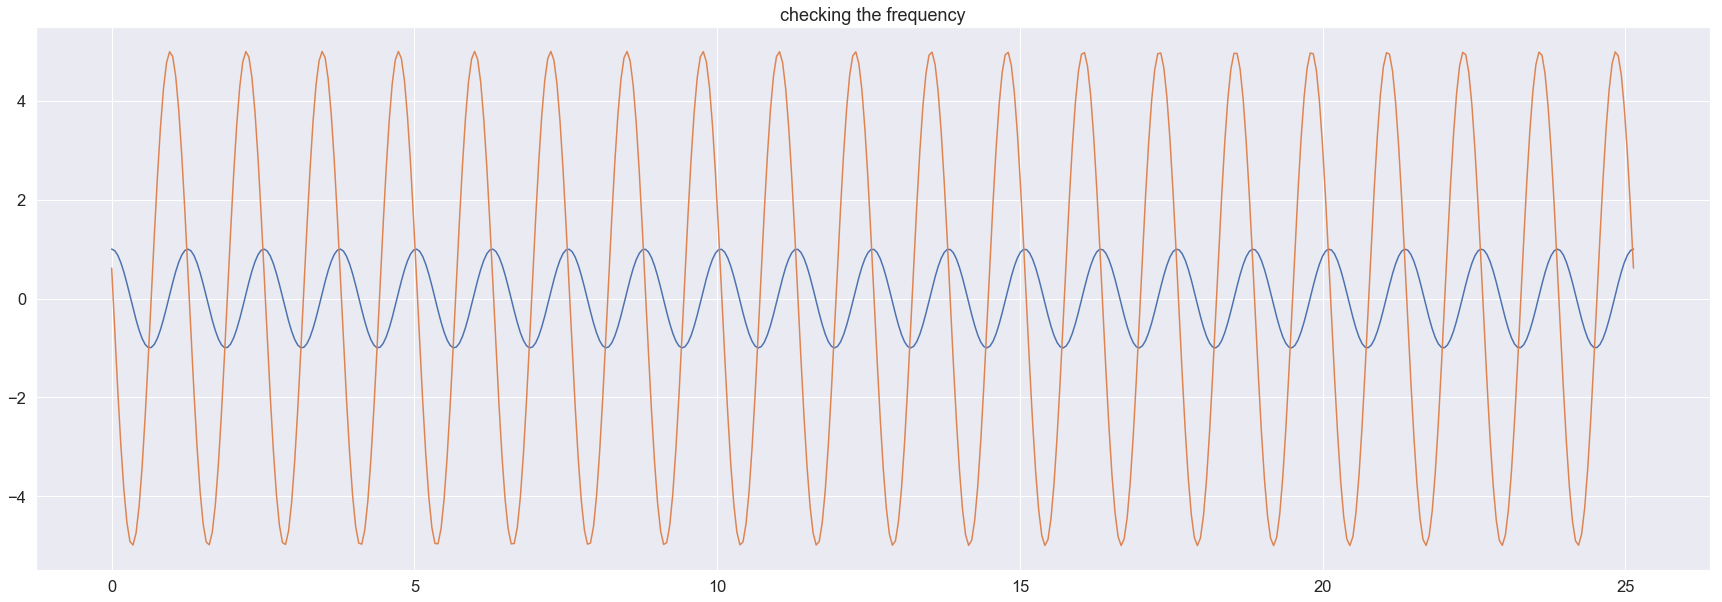

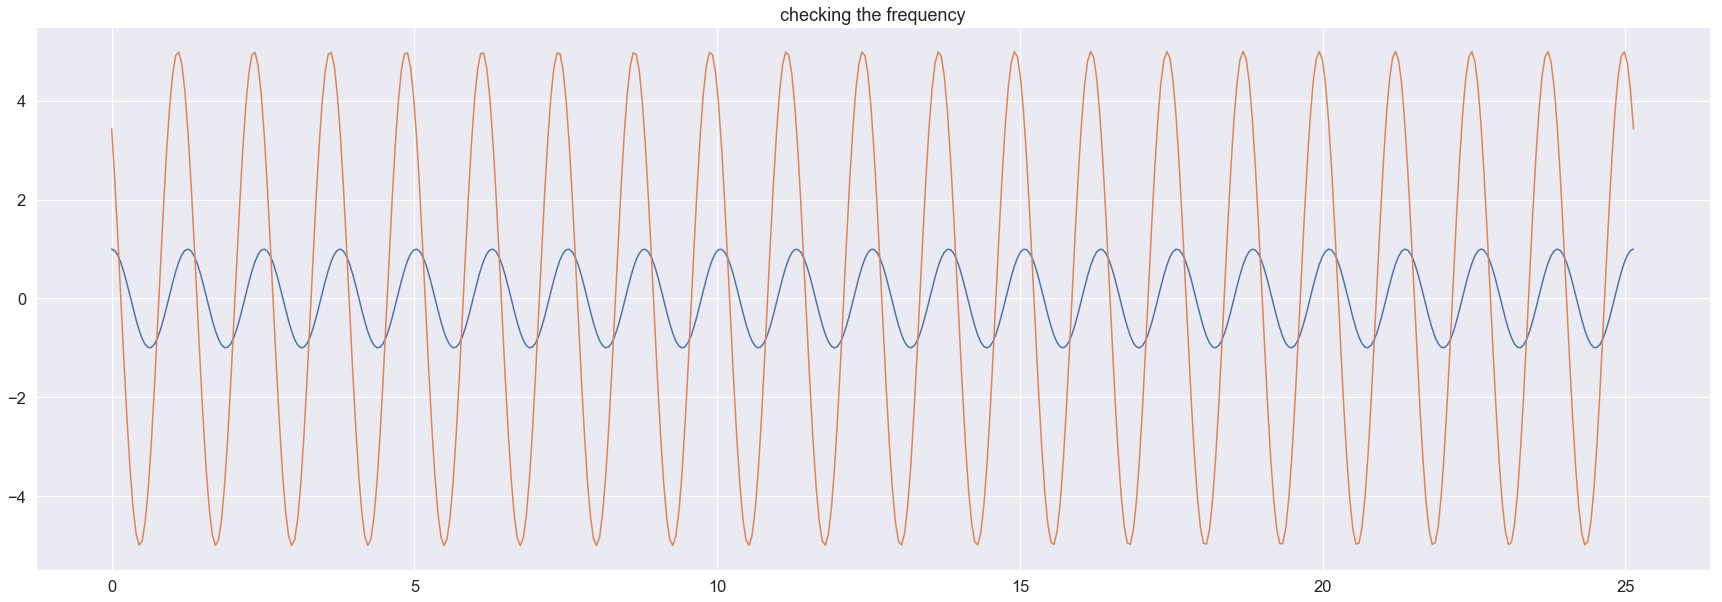

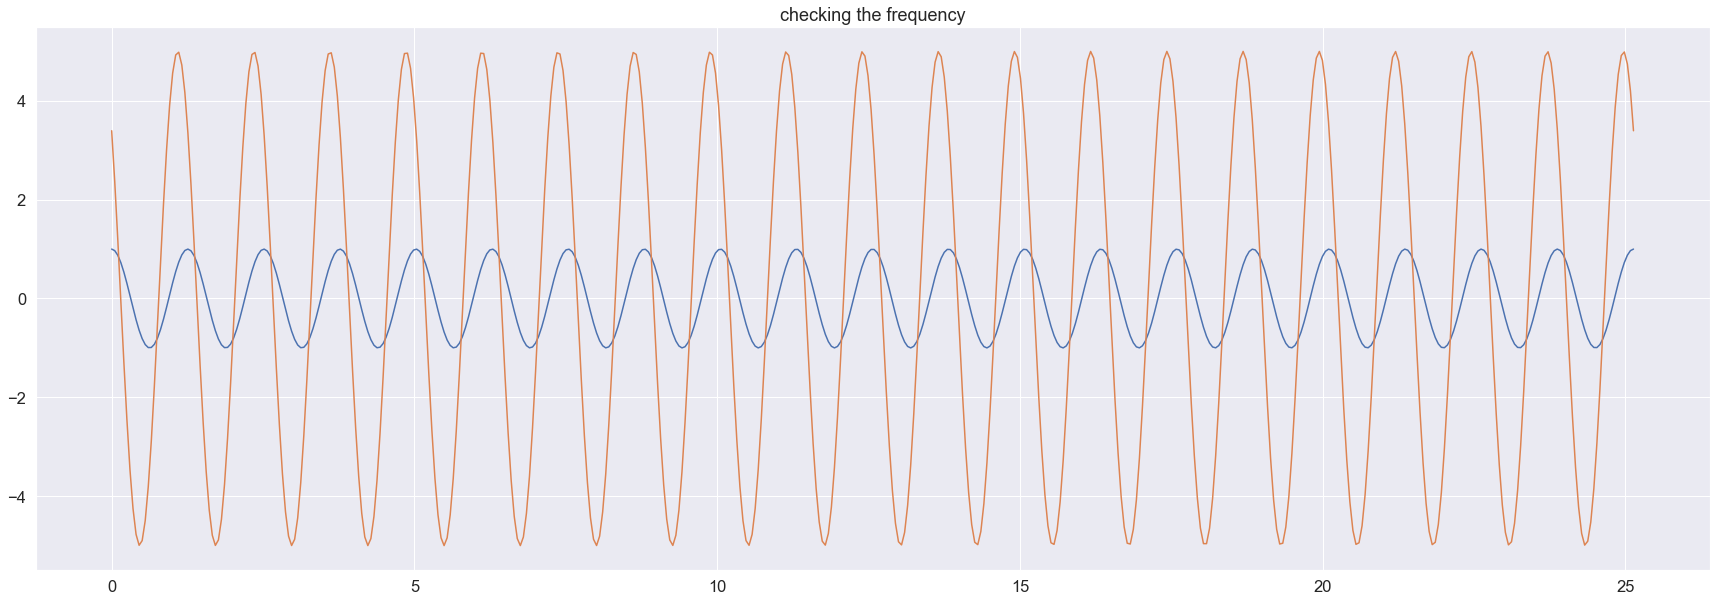

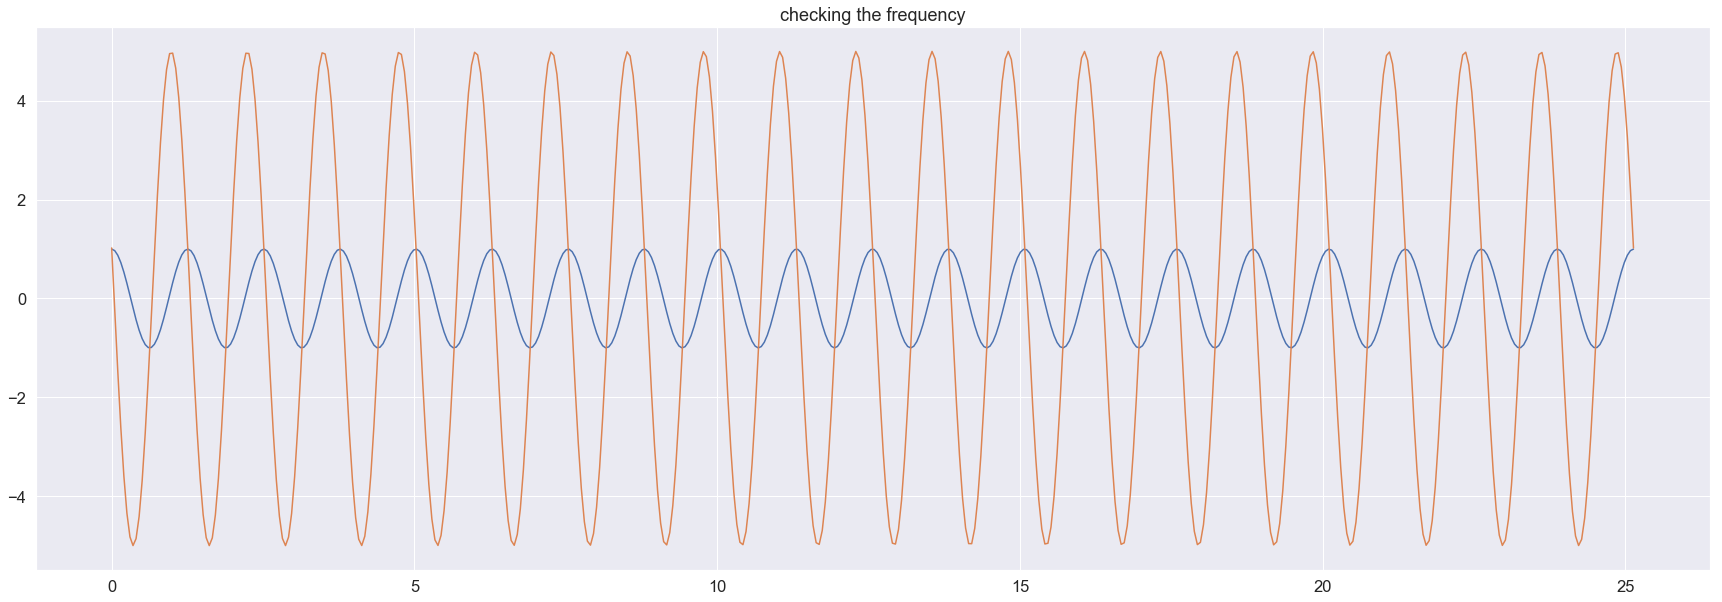

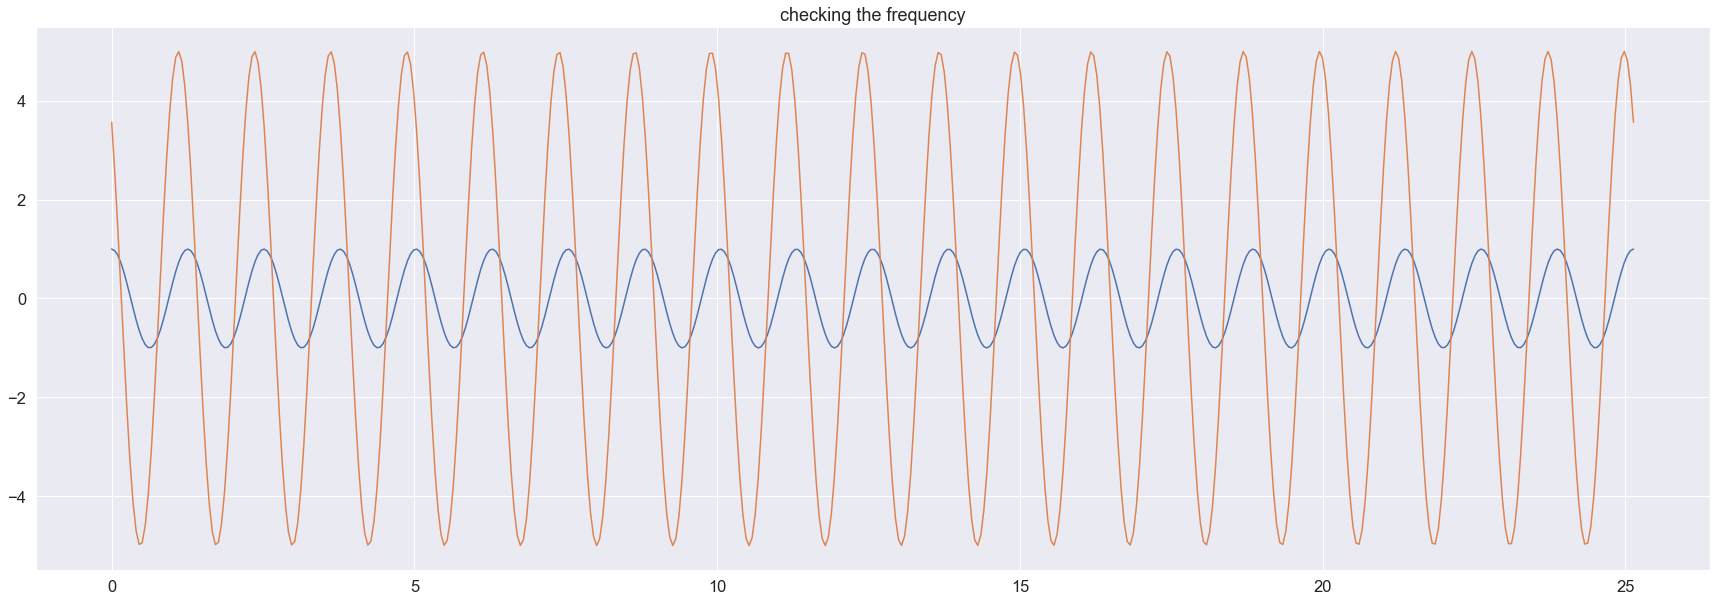

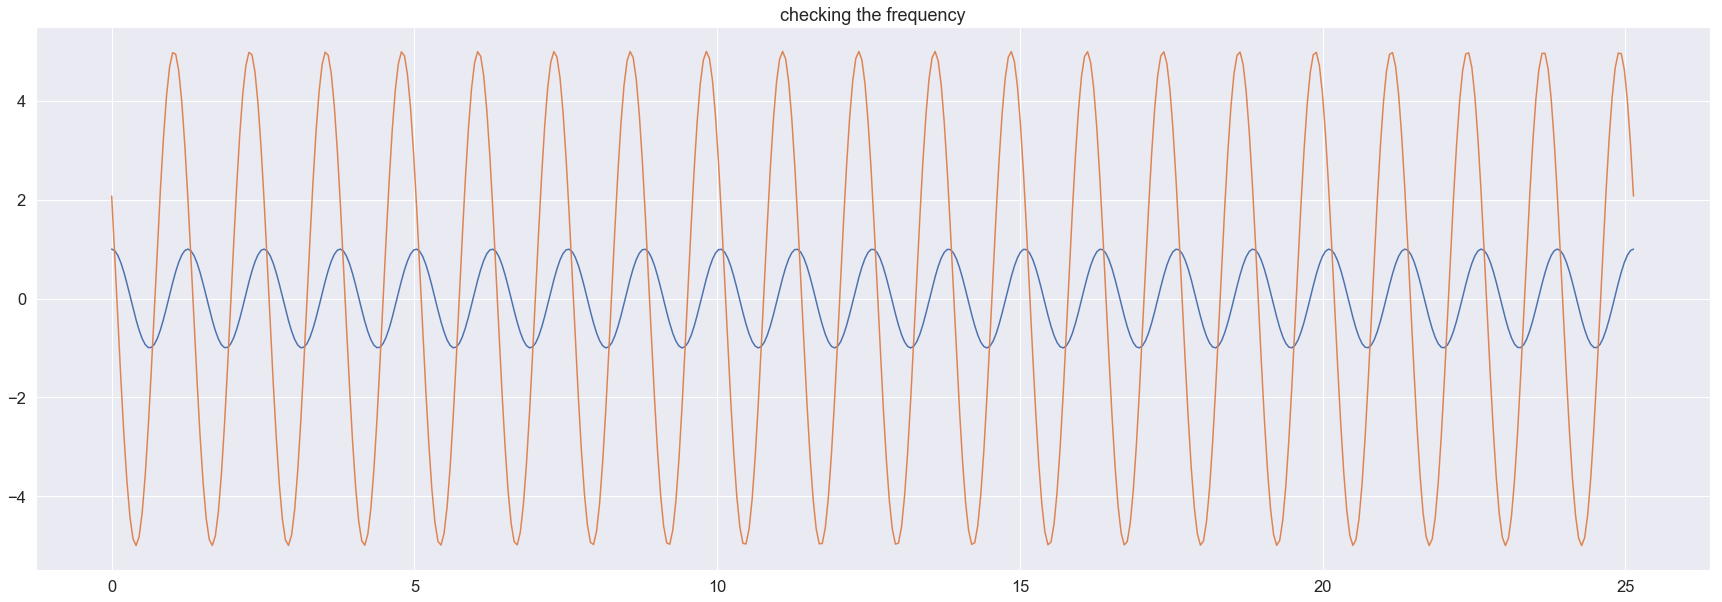

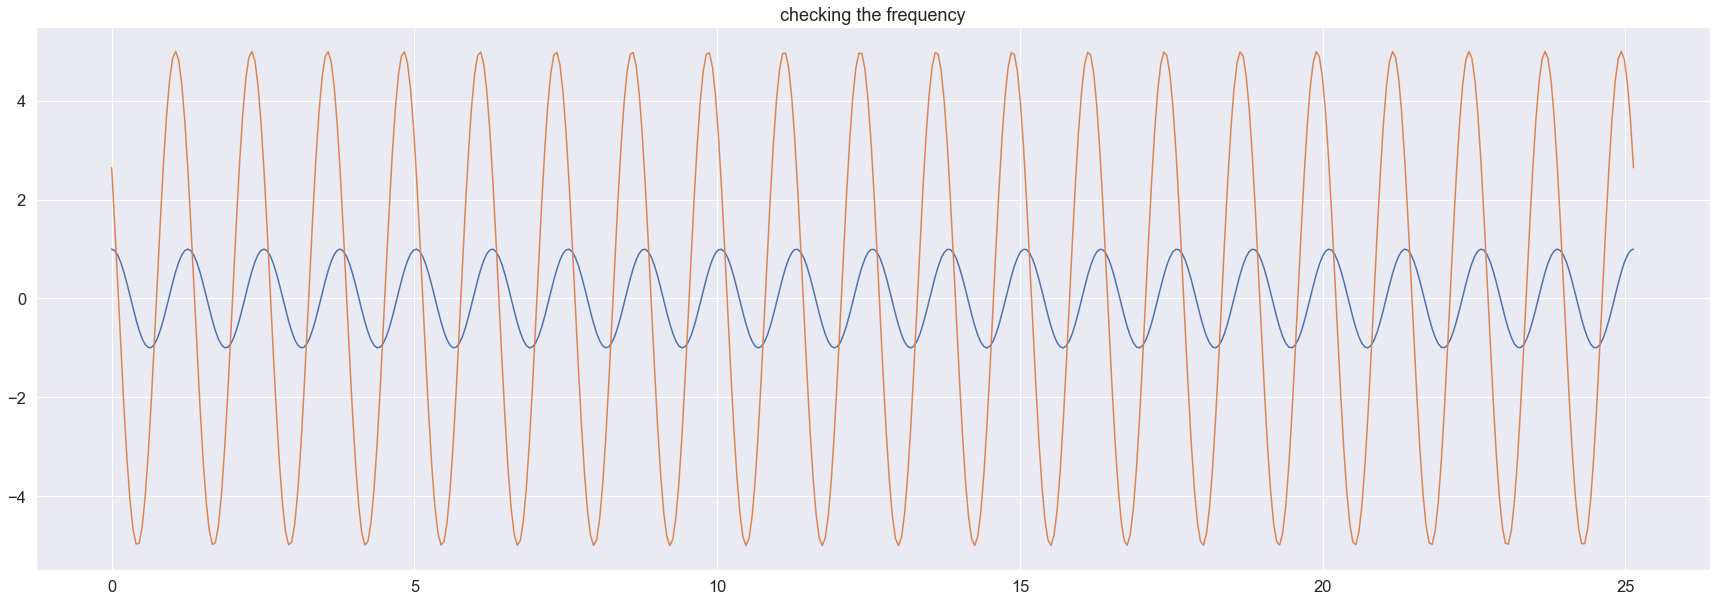

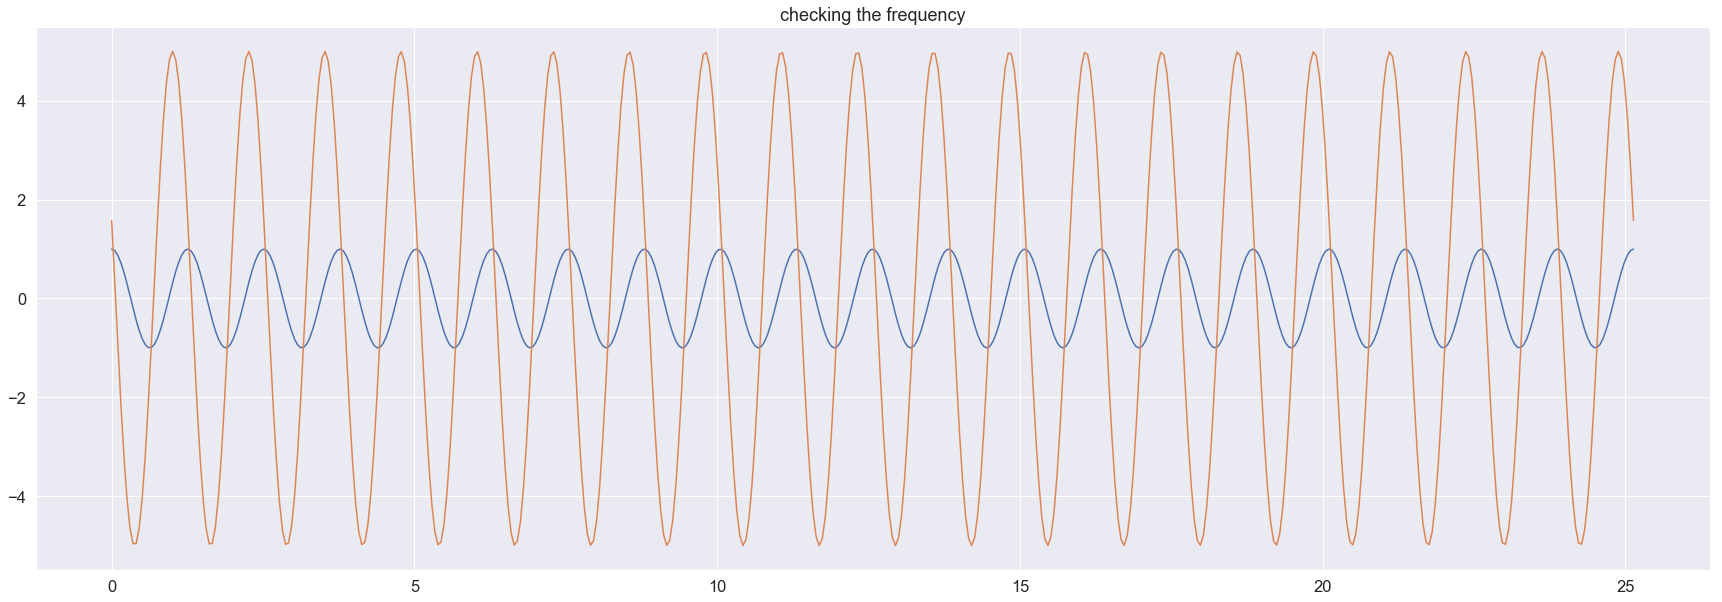

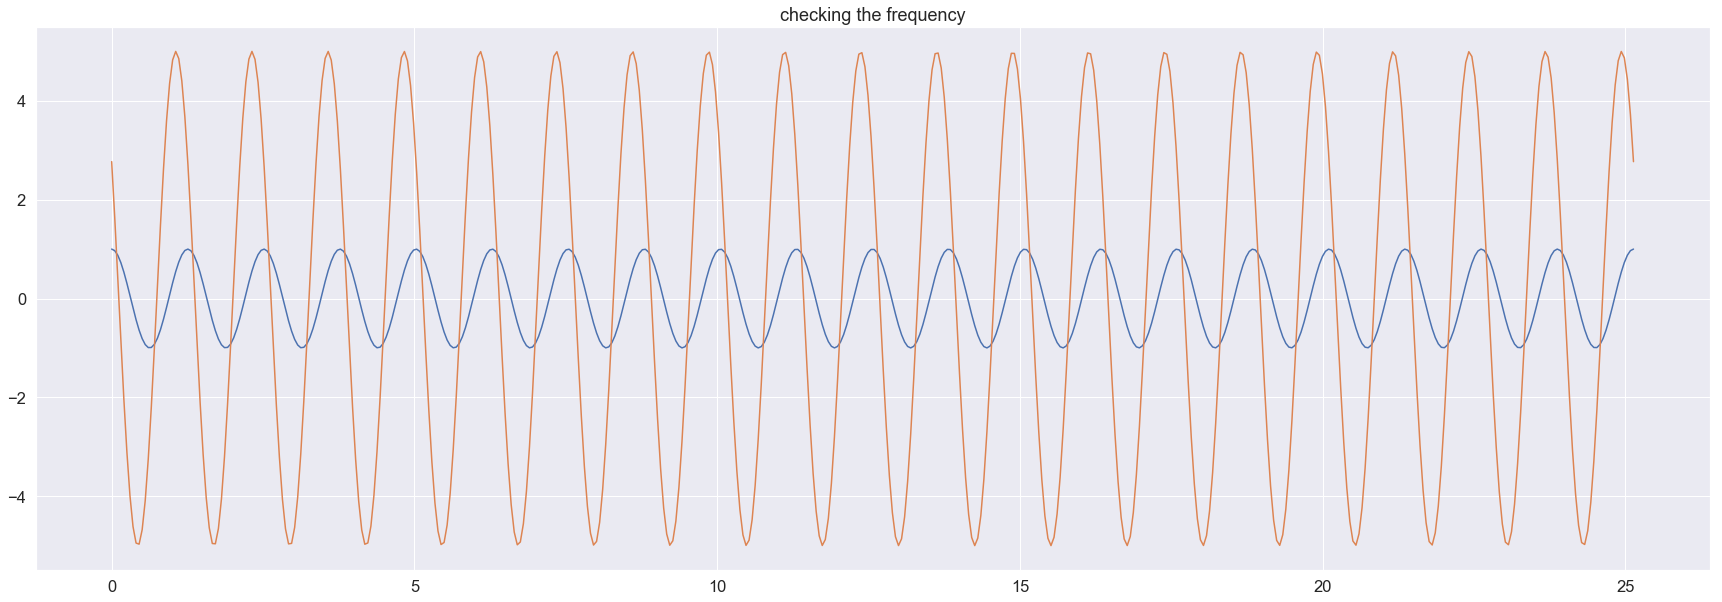

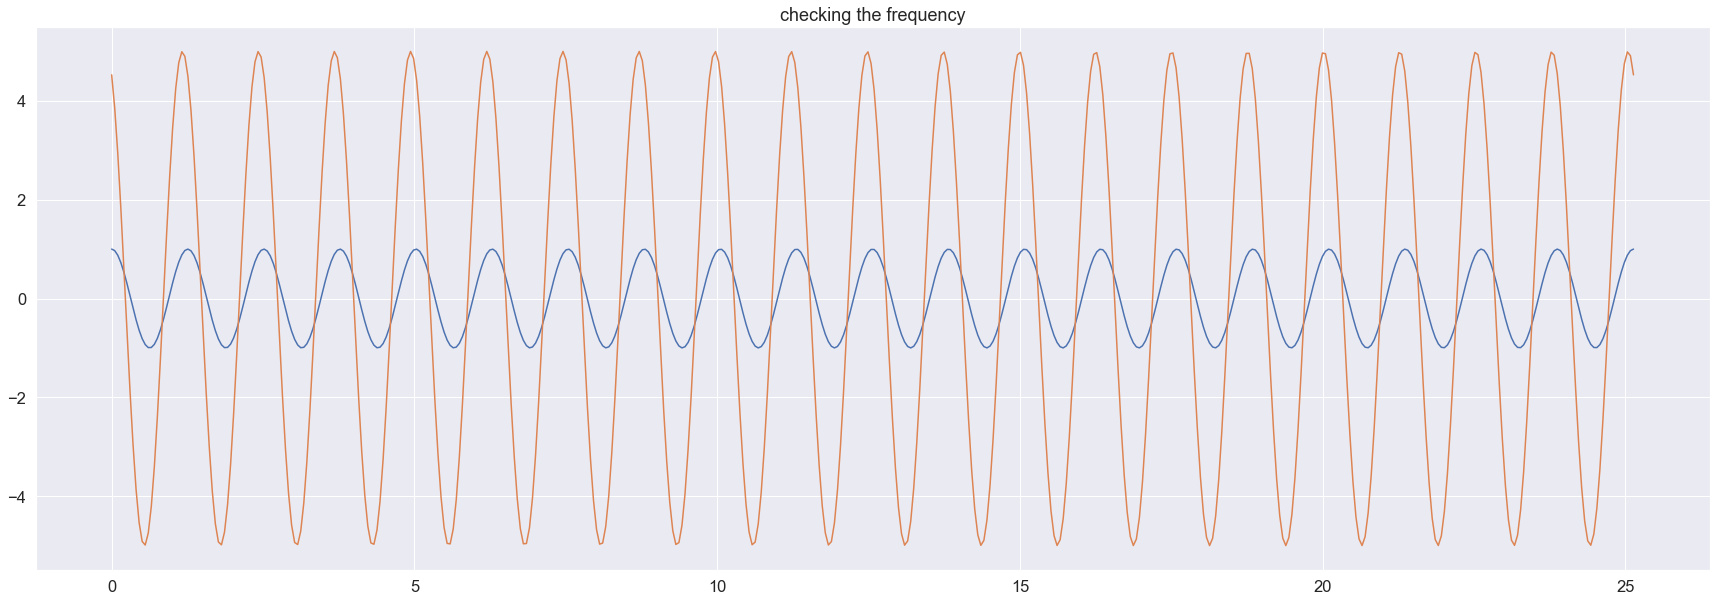

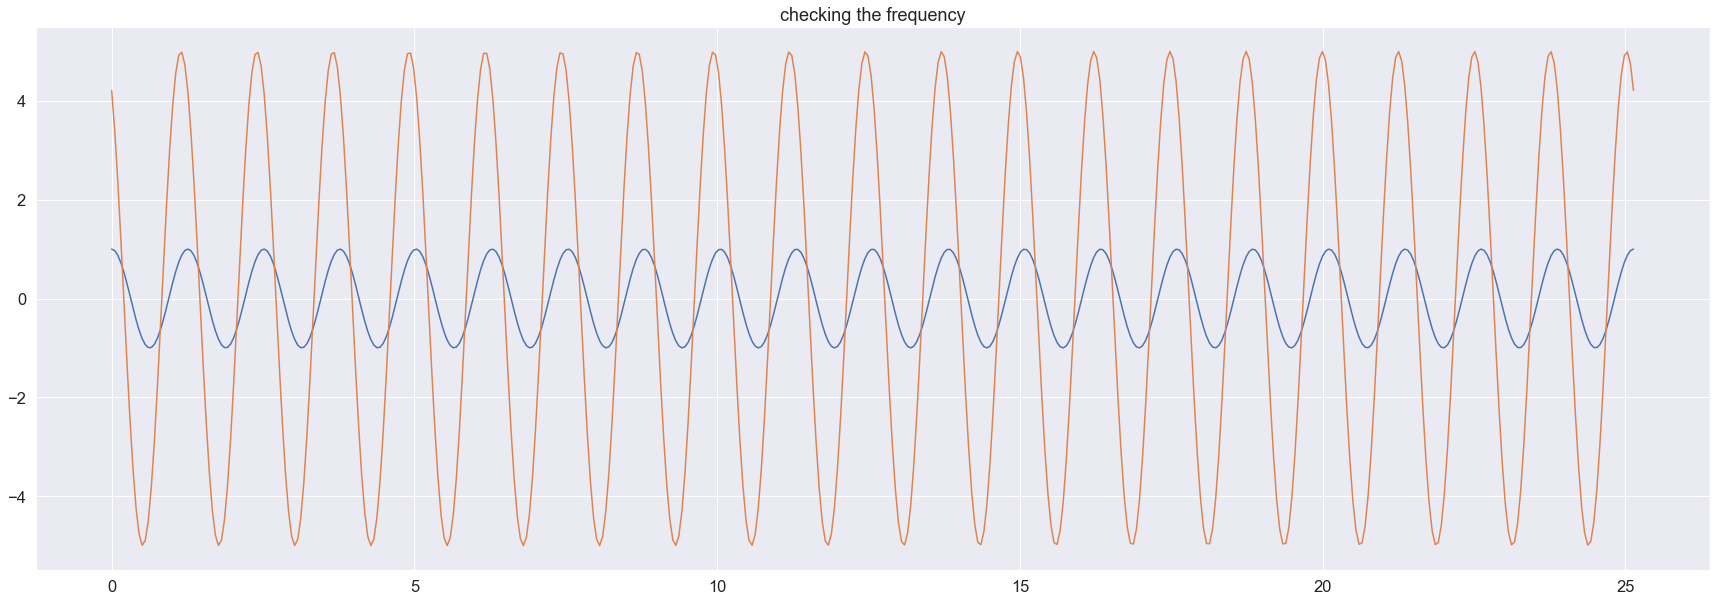

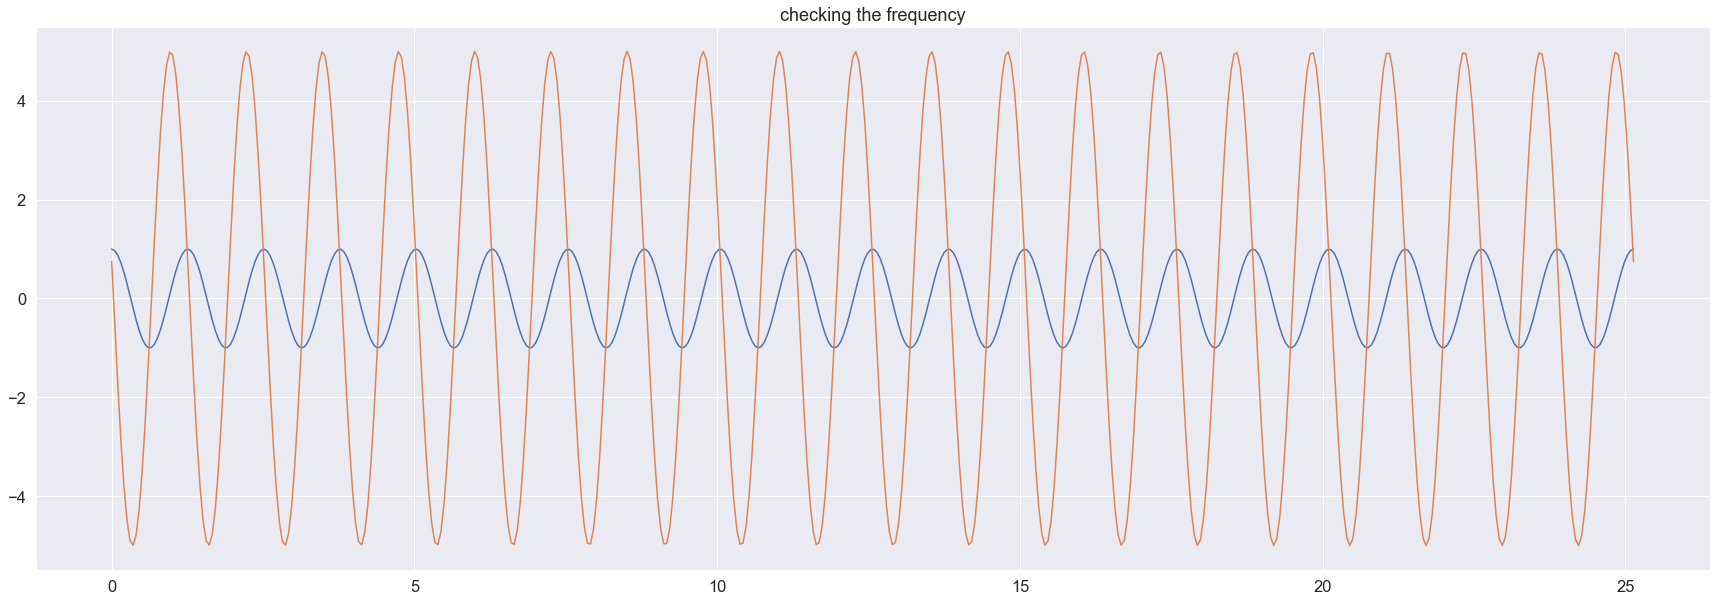

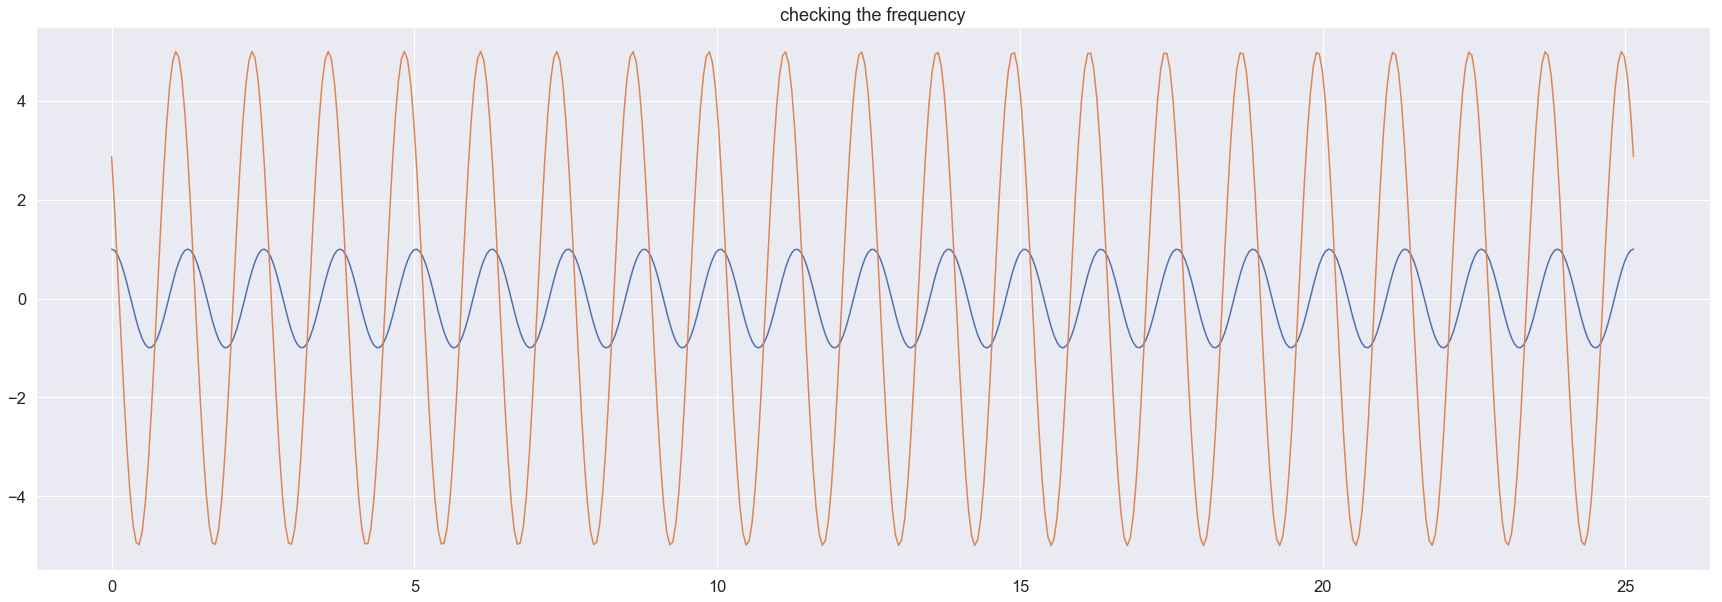

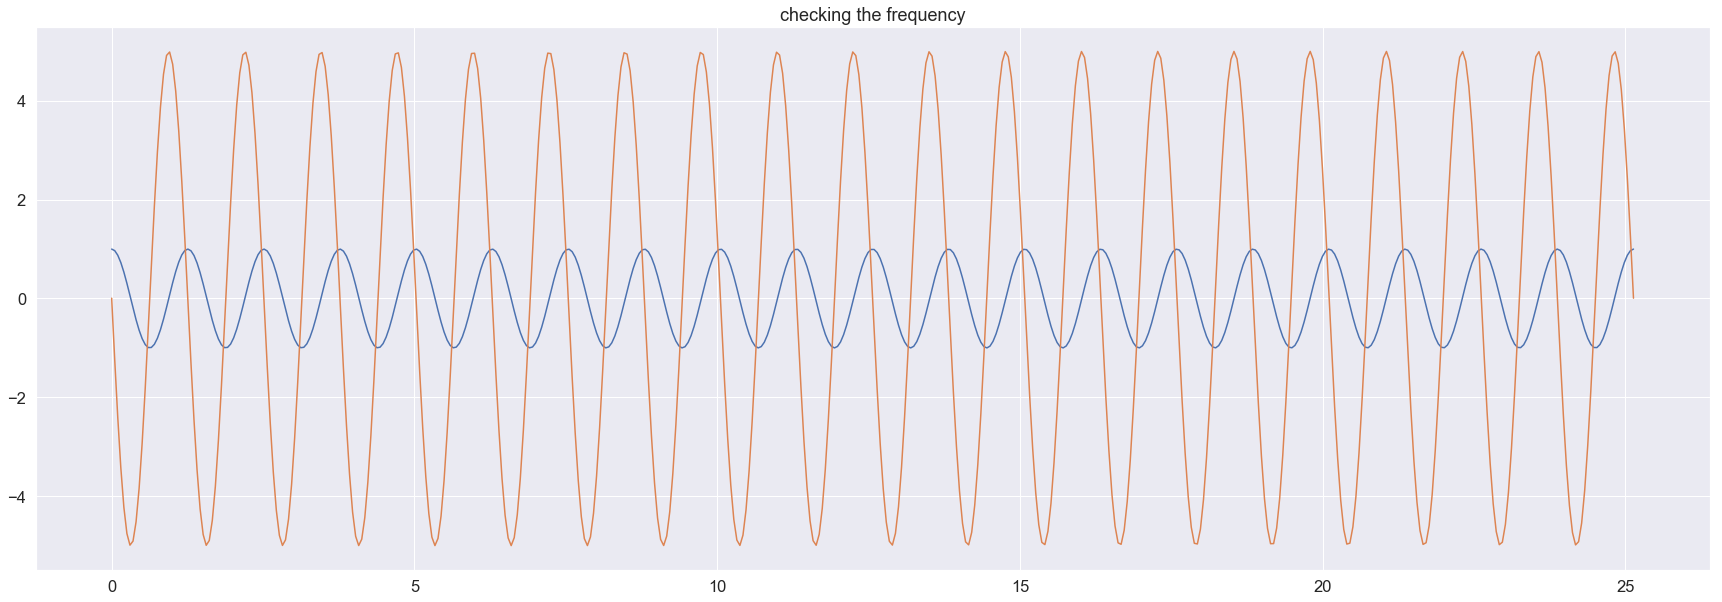

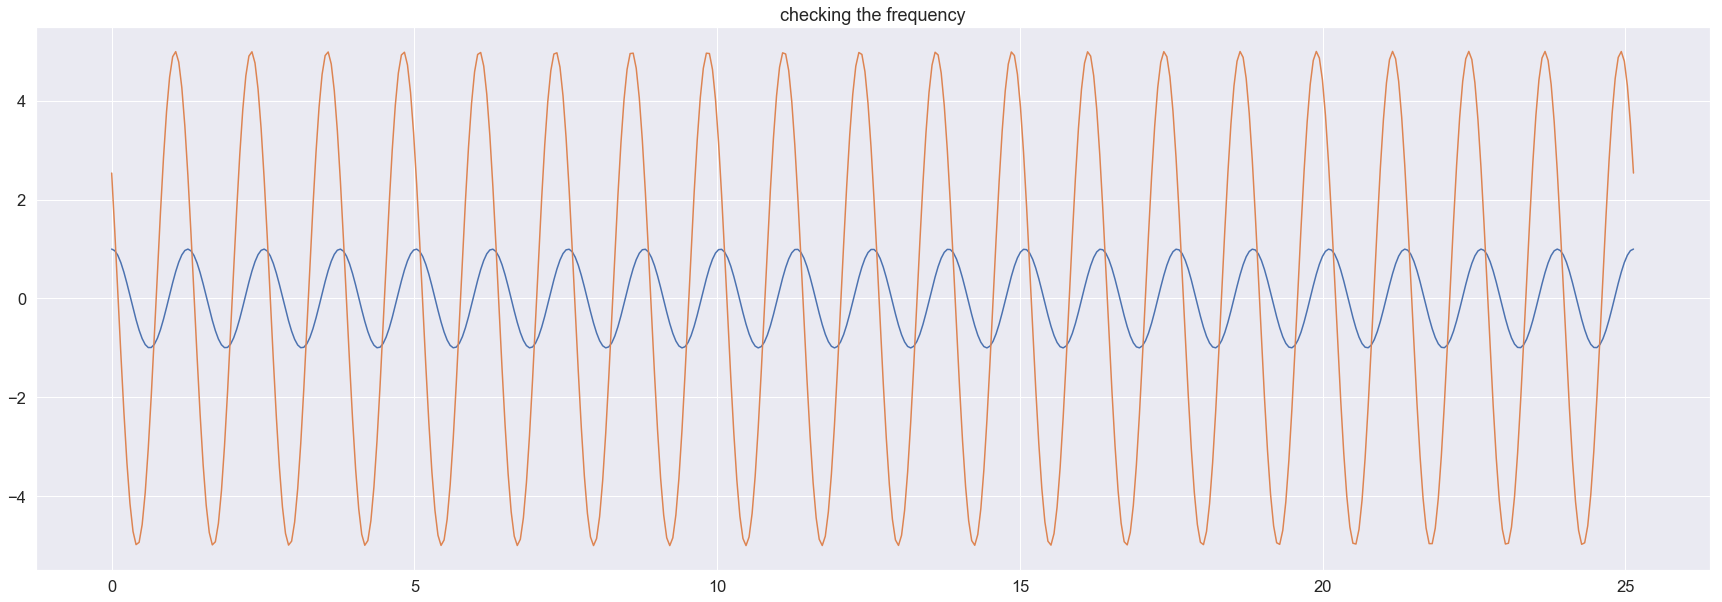

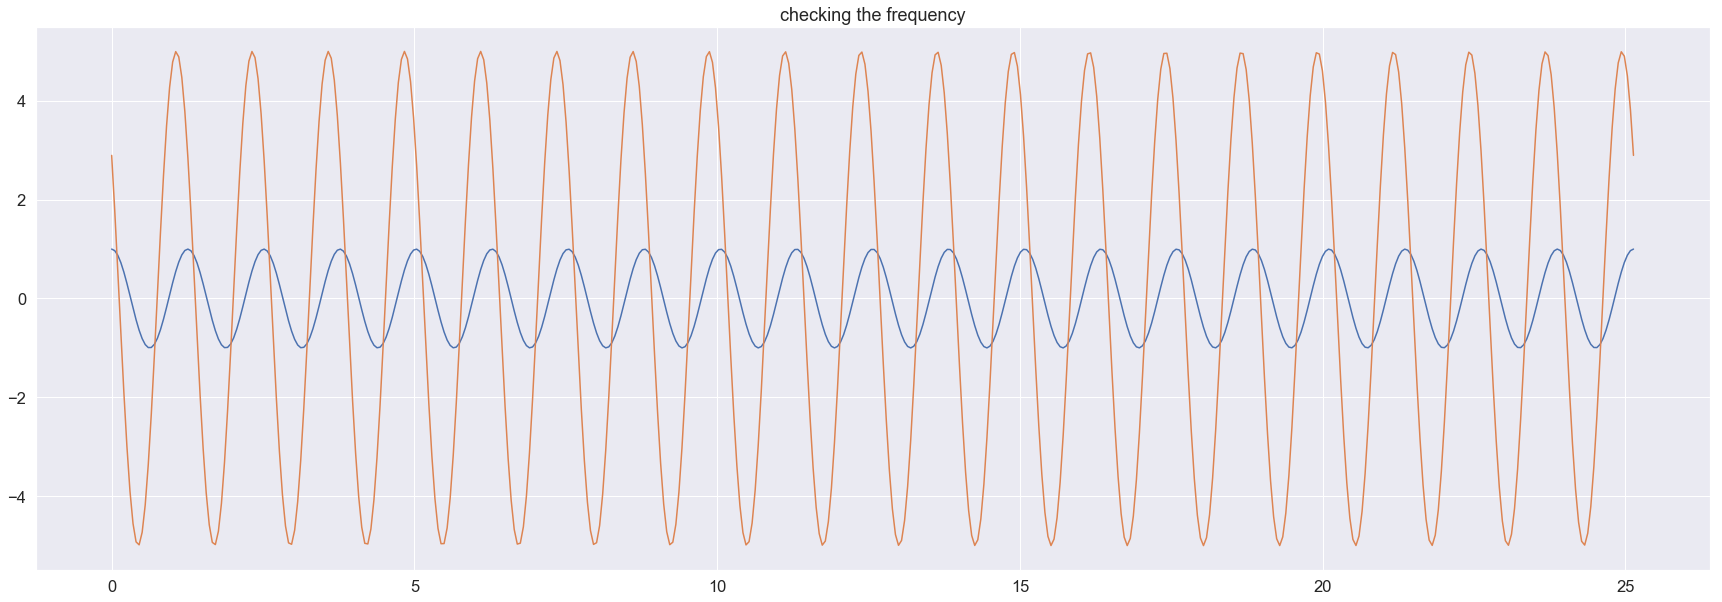

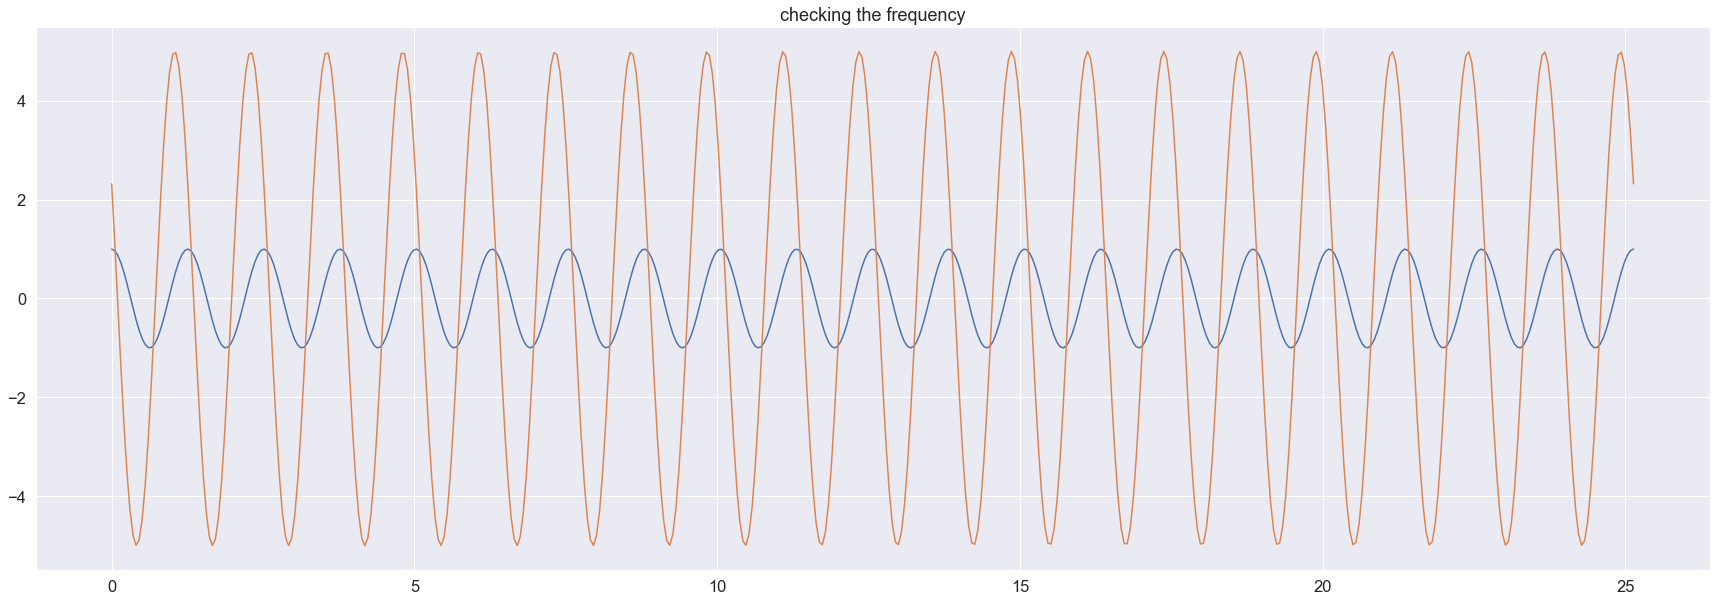

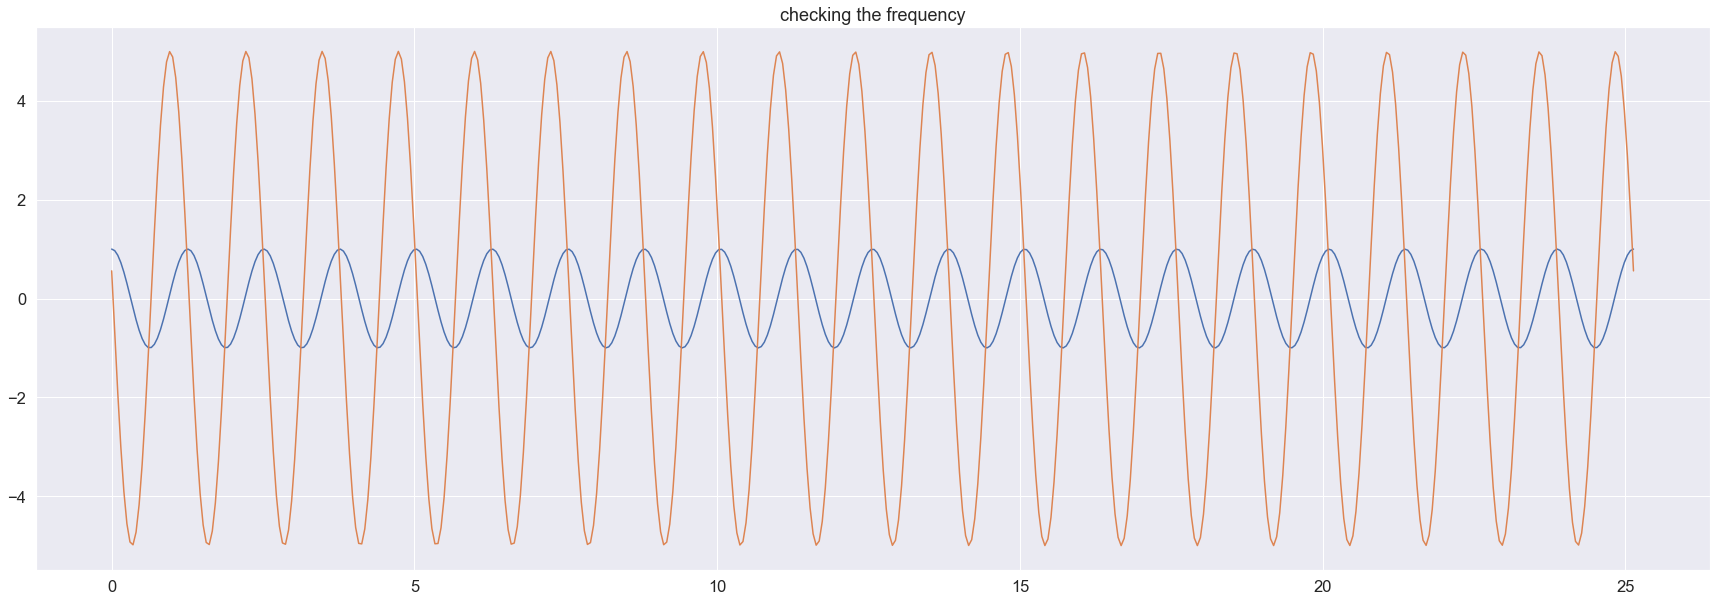

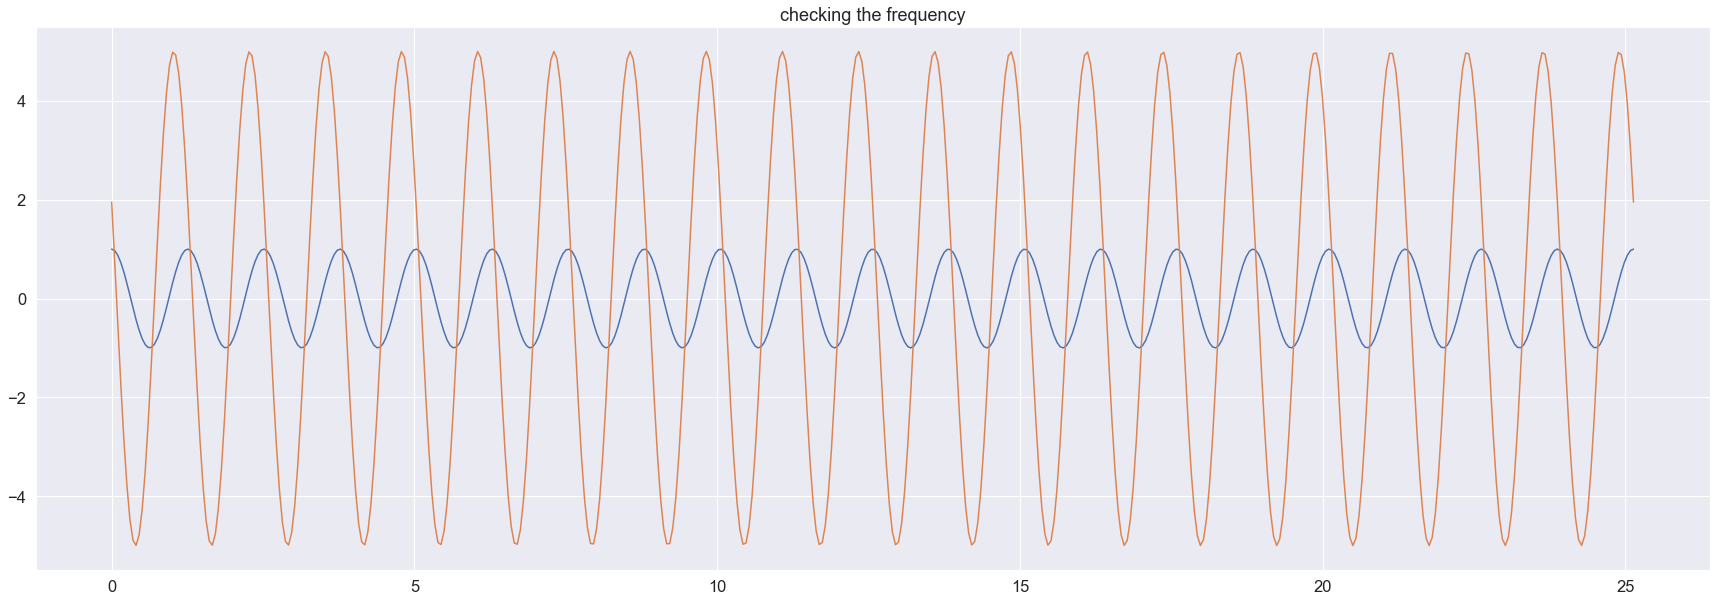

In [222]:
import experiment_circuit
from experiment_circuit import exp1
reload(experiment_circuit)
experiment_circuit.exp1(N_MC=5,subsample=[10,8,6,4,2])